### Подключение библиотек

In [1]:
# данный блок предназначен только для подключения необходимых библиотек
# запрещается подключать библиотеки в других блоках
#
# установка дополнительных библиотек размещается прямо здесь (обязательно закоментированы)
#
# pip install

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold 
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder, PolynomialFeatures, OneHotEncoder
from sklearn.pipeline import Pipeline, FeatureUnion, make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.compose import ColumnTransformer
import category_encoders as ce
from sklearn.preprocessing import KBinsDiscretizer


from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics 
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

### Обучение и выполнение лучшей модели

In [3]:
# В области находится одна, единственная, итоговая модель машинного обучения с однозначными, 
# зафиксированными параметрами
#
# В данной области категорически запрещается искать, выбирать, улучшать, оптимизировать, 
# тюниговать и т.д. модель машинного обучения (тюник в сопровождающих файлах)

In [4]:
# Путь к тренировочному набору
path_train = 'train_house_B.csv' # содержит только имя файла, без имен папок
# Путь к тестовому набору
path_test  = 'test_house_B.csv' # содержит только имя файла, без имен папок

In [5]:
# Блок(и) обучения и поверки модели, а также отбора необходимых значимых столбцов

In [6]:
df = pd.read_csv(path_train)
df1 = pd.read_csv(path_test)

y = np.array(df.price)
X = df.drop(columns=['price'])

X_train, X_test, y_train, y_test = train_test_split(X, y)

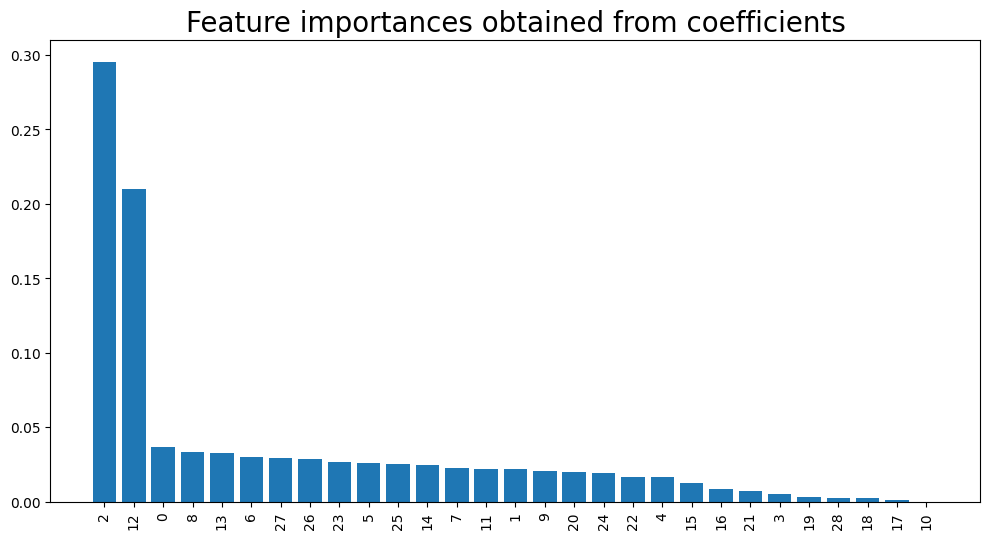

In [7]:
model = RandomForestRegressor(n_estimators=500, random_state=42)

model.fit(X_train, y_train)

importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': model.feature_importances_
})
importances = importances.sort_values(by='Importance', ascending=False)


plt.figure(figsize=(12,6))
plt.bar(x=importances['Attribute'], height=importances['Importance'])
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

In [8]:
selected_features = importances.index
selected_features = selected_features[0:19]
selected_features

Index([2, 12, 0, 8, 13, 6, 27, 26, 23, 5, 25, 14, 7, 11, 1, 9, 20, 24, 22], dtype='int64')

In [9]:
df = df[['2', '12', '6', '0', '5', '26', '8', '23', '14', '7', '11', '4', '1', '20', '13', '25', '22', '9', '24']]
df1 = df1[['2', '12', '6', '0', '5', '26', '8', '23', '14', '7', '11', '4', '1', '20', '13', '25', '22', '9', '24']]

In [10]:
rf_model = make_pipeline(RandomForestRegressor(max_features= 12, min_samples_leaf= 3, n_estimators= 500))
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
print('mape: ', mean_absolute_percentage_error(y_test,rf_pred))

mape:  0.18520059688094986


In [11]:
# Блок предсказания с использованием тестового набора

In [12]:
y_predict = rf_model.predict(df1)

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- 10
- 15
- 16
- 17
- 18
- ...


In [18]:
# Маска отобраных столбцов для предсказания из тестового набора
mask = df1.columns

# Название вектора предсказанных значений  y_predict полученого на основании тестового набора
y_predict = y_predict


C:\Users\Arina\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names seen at fit time, yet now missing:
- 10
- 15
- 16
- 17
- 18
- ...

  warnings.warn(message, FutureWarning)


ValueError: X has 19 features, but RandomForestRegressor is expecting 29 features as input.